# Chapter 13 푸리에 급수로 음파 분석하기

Helper functions

In [1]:
import matplotlib.pyplot as plt
def plot_function(f,xmin,xmax,**kwargs):
    ts = np.linspace(xmin,xmax,1000)
    plt.plot(ts,[f(t) for t in ts],**kwargs)
    
def plot_sequence(points,max=100,line=False,**kwargs):
    if line:
        plt.plot(range(0,max),points[0:max],**kwargs)
    else:
        plt.scatter(range(0,max),points[0:max],**kwargs)

## 13.2 파이썬으로 음파 재생하기

### 13.2.1 소리를 처음으로 만들어보기

In [2]:
import pygame, pygame.sndarray
pygame.mixer.init(frequency=44100, size=-16, channels=1)

pygame 2.1.2 (SDL 2.0.18, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import numpy as np
arr = np.random.randint(-32768, 32767, size=44100)
arr

array([-18658,  20624,  22832, ..., -30633, -28321,  -4694])

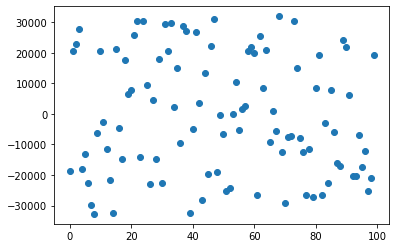

In [4]:
plot_sequence(arr)

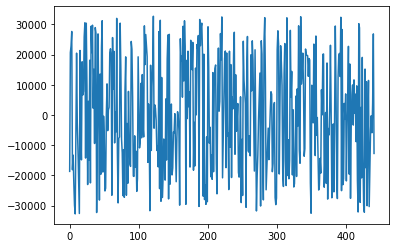

In [5]:
plot_sequence(arr,line=True,max=441)

CAUTION: May play a loud sound!!!

In [6]:
# There is a piece of audio code in the programmer's mathematics error: change to the following code
pygame.mixer.init(frequency=44100, size=-16, channels=1)

size = 44100
buffer = np.random.randint(-32768, 32767, size*2)
buffer = buffer.reshape(size, 2)

sound = pygame.sndarray.make_sound(buffer)
sound.play()

In [7]:
pygame.mixer.init(frequency=44100, size=-16, channels=1)

size = 44100
buffer = np.random.randint(-10000, 10000, size)
buffer = np.repeat(buffer.reshape(size, 1), 2, axis = 1)

sound = pygame.sndarray.make_sound(buffer)
sound.play()

### 13.2.2 음표 재생하기

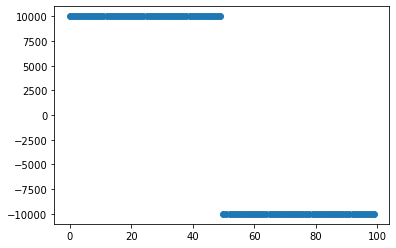

In [8]:
form = np.repeat([10000,-10000],50) #<1>
plot_sequence(form)

In [9]:
arr = np.tile(form,441)

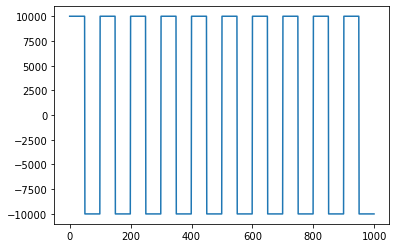

In [10]:
plot_sequence(arr,line=True,max=1000)

In [11]:
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

### 13.2.3 연습문제

### 연습문제 13.1
음 A는 1초에 441번 반복한다. 이번에는 1초에 350번 반복하는 음 F(한국 음이름 '바')의 패턴을 생성하라.

In [12]:
form = np.repeat([10000,-10000],63)
arr = np.tile(form,350)
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

## 13.3 정현파를 소리로 변환하기

### 13.3.1 정현 함수로 오디오 만들기

In [13]:
from math import sin,cos,pi

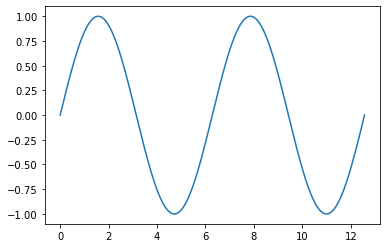

In [14]:
plot_function(sin,0,4*pi)

### 13.3.2 정현 함수의 주파수 바꾸기

In [15]:
def make_sinusoid(frequency,amplitude):
    def f(t): #<1>
        return amplitude * sin(2*pi*frequency*t) #<2>
    return f

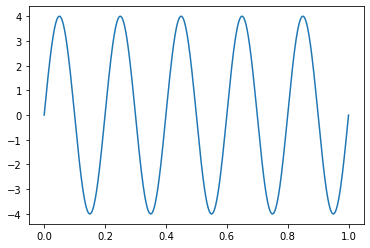

In [16]:
plot_function(make_sinusoid(5,4),0,1)

### 13.3.3 음파의 샘플링과 재생하기

In [17]:
sinusoid = make_sinusoid(441,8000)

In [18]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [19]:
np.arange(0,1,1/44100)

array([0.00000000e+00, 2.26757370e-05, 4.53514739e-05, ...,
       9.99931973e-01, 9.99954649e-01, 9.99977324e-01])

In [20]:
def sample(f,start,end,count): #<1>
    mapf = np.vectorize(f) #<2>
    ts = np.arange(start,end,(end-start)/count) #<3>
    values = mapf(ts) #<4>
    return values.astype(np.int16) #<5>

In [21]:
sinusoid = make_sinusoid(441,8000)
arr = sample(sinusoid, 0, 1, 44100)
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

### 13.3.4 연습문제

### 연습문제 13.2
탄젠트 함수 $\tan(t) = \sin(t)/\cos(t)$를 플로팅하라. 이 함수의 주기를 구하라.

(-10.0, 10.0)

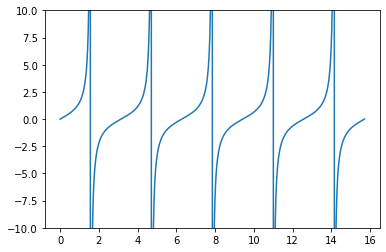

In [22]:
from math import tan
plot_function(tan,0,5*pi)
plt.ylim(-10,10) #<1>

### 연습문제 13.3
$\sin(3\pi t)$의 주파수를 구하라. 이 함수의 주기를 구하라.

#### $\sin(t)$의 주파수는 $1/(2\pi)$이고, 사인 함수의 인자에 $3\pi$를 곱하면 주파수도 $3\pi$배 늘어난다. 결과로 얻은 주파수는 $(3\pi)/(2\pi) = 3/2$이다/ 주기는 주파수의 역수이므로 $2/3$이다.

### 연습문제 13.4
주파수가 5인 $\cos(kt)$에 대하여 $k$값을 구하라. 함수 $\cos(kt)$를 0에서 1 범위에서 플로팅하고 이 그래프가 5번 반복됨을 보여라.

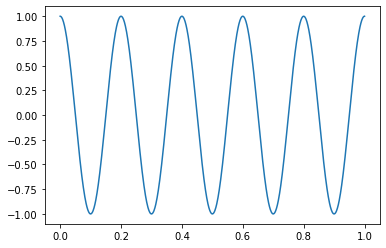

In [23]:
plot_function(lambda t: cos(10*pi*t),0,1)

## 13.4 음파를 결합해 새 음파 만들기

### 13.4.1 샘플링된 음파를 더해 화음 만들기

In [24]:
np.array([1,2,3]) + np.array([4,5,6])

array([5, 7, 9])

In [25]:
sample1 = sample(make_sinusoid(441,8000),0,1,44100)
sample1 = np.repeat(sample1.reshape(44100,1), 2,axis=1)
sample2 = sample(make_sinusoid(551,8000),0,1,44100)
sample2 = np.repeat(sample2.reshape(44100,1), 2,axis=1)

In [26]:
sound1 = pygame.sndarray.make_sound(sample1)
sound2 = pygame.sndarray.make_sound(sample2)
sound1.play()
sound2.play()

In [27]:
chord = pygame.sndarray.make_sound(sample1 + sample2)
chord.play()

### 13.4.2 두 음파의 합 그리기

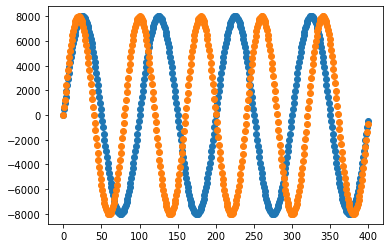

In [28]:
sample1 = sample(make_sinusoid(441,8000),0,1,44100)
sample2 = sample(make_sinusoid(551,8000),0,1,44100)
plot_sequence(sample1,max=400)
plot_sequence(sample2,max=400)

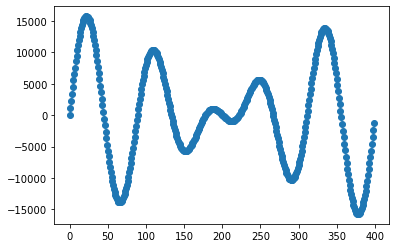

In [29]:
plot_sequence(sample1+sample2,max=400)

### 13.4.3 정현 함수의 일차결합 만들기

In [30]:
def const(n):
    return 1

def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n,an) in enumerate(a)] #<1>
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)] #<2>
        return a0*const(t) + sum(cos_terms) + sum(sin_terms) #<3>
    return result

In [31]:
f = fourier_series(0,[0,0,0,0,0],[0,0,0,1,1])

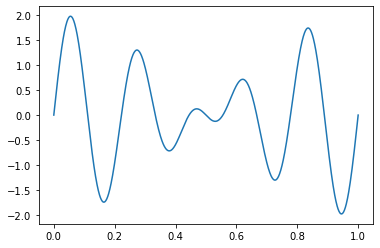

In [32]:
plot_function(f,0,1)

### 13.4.4 정현 함수로 익숙한 함수 만들기

In [33]:
f1 = fourier_series(0,[],[4/pi])

In [34]:
f3 = fourier_series(0,[],[4/pi,0,4/(3*pi)])

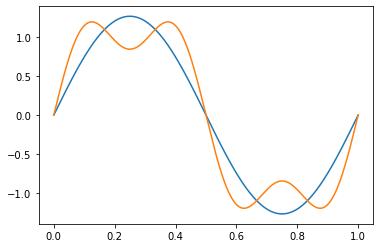

In [35]:
plot_function(f1,0,1)
plot_function(f3,0,1)

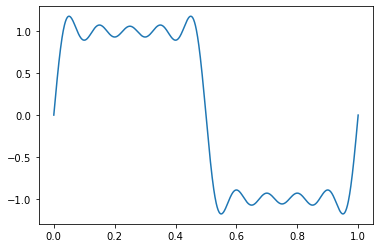

In [36]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,10)] #<1>
f = fourier_series(0,[],b)
plot_function(f,0,1)

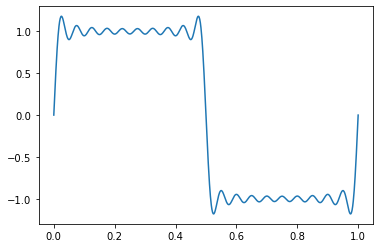

In [37]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,20)]
f = fourier_series(0,[],b)
plot_function(f,0,1)

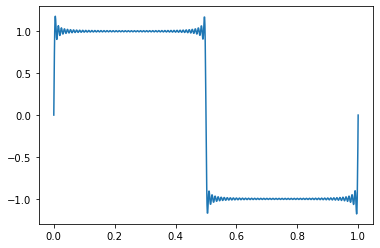

In [38]:
b = [4/(n * pi) if n%2 != 0 else 0 for n in range(1,100)]
f = fourier_series(0,[],b)
plot_function(f,0,1)

### 13.4.5 연습문제

### 연습문제 13.5 (Mini-project)
앞의 사각파 푸리에 급수를 수정해서 주파수를 441 Hz로 만들고, 이를 샘플링해 모양만 사각파가 아님을 확인하라. 이 샘플링 결과는 사각파와 마찬가지인 소리를 내야 한다.

In [39]:
arr = sample(lambda t: 10000* f(441*t), 0, 1, 44100)
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()

## 13.5 음파를 푸리에 급수로 분해하기

### 13.5.2 주기함수의 내적 정의하기

In [40]:
def inner_product(f,g,N=1000):
    dt = 1/N #<1>
    return 2*sum([f(t)*g(t)*dt for t in np.arange(0,1,dt)]) #<2>

In [41]:
def s(n): #<1>
    def f(t):
        return sin(2*pi*n*t)
    return f

def c(n): #<2>
    def f(t):
        return cos(2*pi*n*t)
    return f

In [42]:
inner_product(s(1),c(1))

4.2197487366314734e-17

In [43]:
inner_product(s(1),s(2))

-1.4176155163484784e-18

In [44]:
inner_product(c(3),s(10))

-1.7092447249233977e-16

In [45]:
inner_product(s(1),s(1))

1.0000000000000002

In [46]:
inner_product(c(1),c(1))

0.9999999999999999

In [47]:
inner_product(c(3),c(3))

1.0

In [48]:
from math import sqrt

def const(n):
    return 1 /sqrt(2)

In [49]:
inner_product(const,s(1))

-2.2580204307905138e-17

In [50]:
inner_product(const,c(1))

-3.404394821604484e-17

In [51]:
inner_product(const,const)

1.0000000000000007

### 13.5.3 푸리에 계수를 찾는 함수 작성하기

**note** we have a new const function so fourier_series will behave differently

In [52]:
def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n,an) in enumerate(a)] #<1>
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)] #<2>
        return a0*const(t) + sum(cos_terms) + sum(sin_terms) #<3>
    return result

In [53]:
def fourier_coefficients(f,N):
    a0 = inner_product(f,const) #<1>
    an = [inner_product(f,c(n)) for n in range(1,N+1)] #<2>
    bn = [inner_product(f,s(n)) for n in range(1,N+1)] #<3>
    return a0, an, bn

In [54]:
f = fourier_series(0,[2,3,4],[5,6,7])

In [55]:
fourier_coefficients(f,3)

(-3.812922200197022e-15,
 [1.9999999999999887, 2.999999999999999, 4.0],
 [5.000000000000002, 6.000000000000001, 7.0000000000000036])

### 13.5.4 사각파의 푸리에 계수 구하기

In [56]:
def square(t):
    return 1 if (t%1) < 0.5 else -1

In [57]:
a0, a, b = fourier_coefficients(square,10)

In [58]:
b[0], 4/pi

(1.273235355942202, 1.2732395447351628)

In [59]:
b[2], 4/(3*pi)

(0.4244006151333577, 0.4244131815783876)

In [60]:
b[4], 4/(5*pi)

(0.2546269646514865, 0.25464790894703254)

### 13.5.5 다른 파형의 푸리에 계수 구하기

In [61]:
def sawtooth(t):
    return t%1

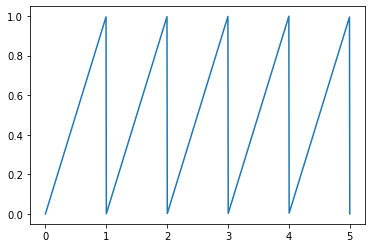

In [62]:
plot_function(sawtooth,0,5)

In [63]:
approx = fourier_series(*fourier_coefficients(sawtooth,10))

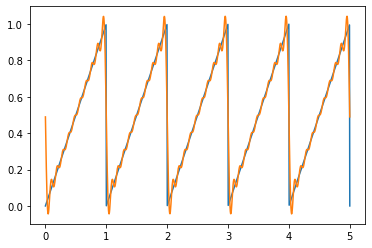

In [64]:
plot_function(sawtooth,0,5)
plot_function(approx,0,5)

In [65]:
def speedbumps(t):
    if abs(t%1 - 0.5) > 0.25:
        return 0
    else:
        return sqrt(0.25*0.25 - (t%1 - 0.5)**2)

In [66]:
approx = fourier_series(*fourier_coefficients(speedbumps,10))

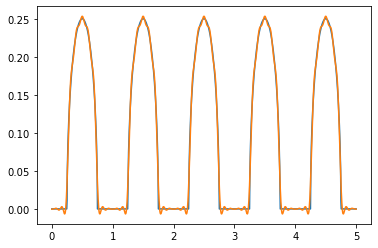

In [67]:
plot_function(speedbumps,0,5)
plot_function(approx,0,5)

### 13.5.6 연습문제

### 연습문제 13.6
벡터 $u_1 = (2,0,0), \, u_2 = (0,1,1), \, u_3 = (1,0,-1)$는 $R^3$의 기저를 형성한다.벡터 $v = (3,4,5)$에 대해 세 내적 $a_1 = v \cdot u_1, \, a_2 = v \cdot u_2, \, a_3 = v \cdot u_3$를 계산하라. $v$가 $a_1u_1 + a_2u_2 + a_3u_3$와는 같지 **않음**을 보여라. 같지 않은 이유를 설명하라.

#### 각 내적은 다음과 같다.
$$
a_1 = v \cdot u_1 = (3,4,5) \cdot (2,0,0) = 6 \\
a_2 = v \cdot u_2 = (3,4,5) \cdot (0,1,1) = 9 \\
a_3 = v \cdot u_3 = (3,4,5) \cdot (1,0,-1) = -2
$$
#### 이 결과로 만든 일차결합 $6 \cdot (2,0,0) + 9 \cdot (0,1,1) -2 \cdot (1,0,-1) = (16,9,2)$는 $(3,4,5)$와 같지 않다. 기저 벡터 $u_1, u_2, u_3$의 길이가 1이 아니고, 서로 수직이 아니기 때문에 이렇게 계산하면 올바른 결과가 나오지 않는다.

### 연습문제 13.7 (Mini-project)
$f(t)$가 상수 함수 $f(t) = k$라고 하자. 적분식을 포함한 내적을 사용해 $<f,f> = 1$이 되도록 하는 $k$값을 구하라. (이미 $k = 1/\sqrt{2}$이어야 한다고 말했지만, 스스로 도출해보라!)

#### 내적 $<f,f>$는 다음과 같이 적분식으로 표현된다.
$$ 2 \cdot \int_0^1 f(t) \cdot f(t)\, dt = 2 \cdot \int_0^1 k \cdot kdt = 2k^2 $$
#### (0부터 1까지 상수 함수 $k^2$의 넓이는 $k^2$이다.) $2k^2$이 1이 되려면 $k^2 = 1/2$이어야 하고, $k$가 양수라고 가정하면 $k = \sqrt{1/2} = 1/\sqrt{2}$이다.

### 연습문제 13.8
상수 기저 함수로 $f(t) = 1$ 대신 $f(t) = 1/\sqrt{2}$를 사용하도록 `fourier_series`를 수정하라.

In [68]:
def fourier_series(a0,a,b):
    def result(t):
        cos_terms = [an*cos(2*pi*(n+1)*t) for (n,an) in enumerate(a)]
        sin_terms = [bn*sin(2*pi*(n+1)*t) for (n,bn) in enumerate(b)]
        return a0/sqrt(2) + sum(cos_terms) + sum(sin_terms)
    return result

### 연습문제 13.9 (Mini-project)
주파수가 441Hz인 톱니파를 재생해 본뒤 그 주파수에서 연주한 사각파 및 사인파 파동과 비교하라.

In [69]:
def modified_sawtooth(t):
    return 8000 * sawtooth(441*t)
arr = sample(modified_sawtooth,0,1,44100)
arr = np.repeat(arr.reshape(44100,1), 2,axis=1)
sound = pygame.sndarray.make_sound(arr)
sound.play()